In [ ]:
"""
01_data_cleaning.py

This script loads raw synthetic loan and macroeconomic data, performs cleaning, type conversions,
and saves cleaned versions for downstream use in credit risk modeling.
"""


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

loan_df = pd.read_csv('../data/synthetic_loan_data.csv', parse_dates=['OriginationDate', 'DefaultDate'])
macro_df = pd.read_csv('../data/macroeconomic_indicators.csv', parse_dates=['Date'])

loan_df.head()

loan_df_raw = pd.read_csv('../data/synthetic_loan_data.csv', parse_dates=['OriginationDate', 'DefaultDate'])
print(loan_df_raw['Defaulted'].value_counts())


Defaulted
0    4016
1     984
Name: count, dtype: int64


In [2]:
loan_df.info()
loan_df.describe()

macro_df.info()
macro_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   LoanID           5000 non-null   object        
 1   CustomerAge      5000 non-null   int64         
 2   Income           5000 non-null   int64         
 3   LoanAmount       5000 non-null   int64         
 4   InterestRate     5000 non-null   float64       
 5   TermMonths       5000 non-null   int64         
 6   CreditScore      5000 non-null   int64         
 7   OriginationDate  5000 non-null   datetime64[ns]
 8   Defaulted        5000 non-null   int64         
 9   DefaultDate      984 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(6), object(1)
memory usage: 390.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------      

,Date,GDP_Growth,Unemployment_Rate,Inflation_Rate
count,64,64.000000,64.000000,64.000000
mean,2022-09-14 22:52:30,1.995318,5.923511,2.514137
min,2020-01-31 00:00:00,0.920395,3.209065,1.824697
25%,2021-05-23 06:00:00,1.584962,5.308309,2.309949
50%,2022-09-15 00:00:00,1.945339,5.846466,2.539071
75%,2024-01-07 18:00:00,2.315526,6.574951,2.732433
max,2025-04-30 00:00:00,4.073948,8.712486,3.440400
std,NaN,0.578814,1.016117,0.314271


In [ ]:
loan_df.isnull().sum()

loan_df['DefaultDate'] = loan_df.apply(
    lambda row: row['DefaultDate'] if row['Defaulted'] == 1 else pd.NaT,
    axis=1
)

loan_df['CreditScore'] = pd.to_numeric(loan_df['CreditScore'], errors='coerce')
loan_df['Income'] = pd.to_numeric(loan_df['Income'], errors='coerce')

In [4]:
macro_df['Date'] = pd.to_datetime(macro_df['Date'])
macro_df.sort_values('Date', inplace=True)


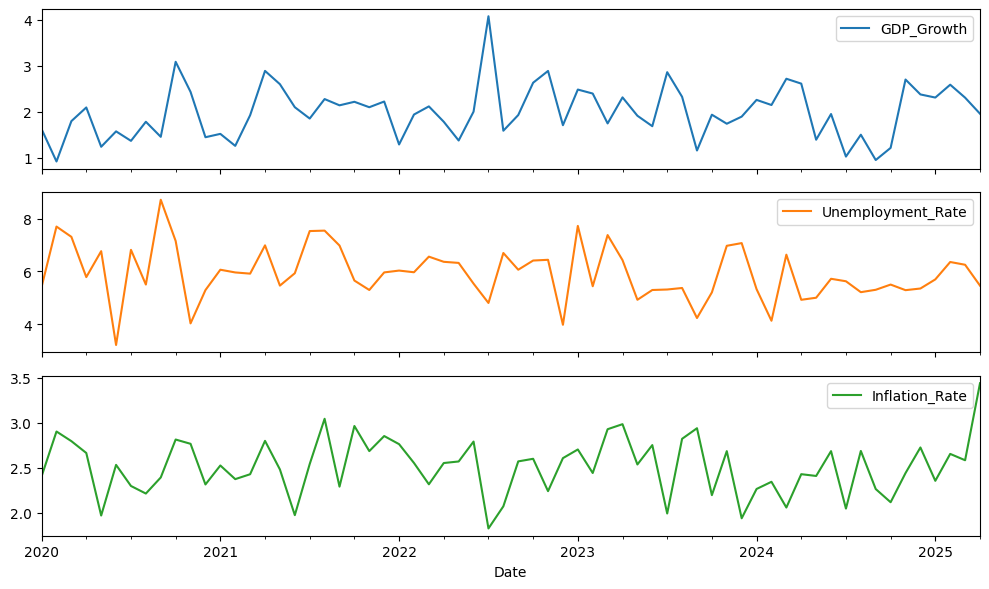

In [5]:

macro_df.plot(x='Date', y=['GDP_Growth', 'Unemployment_Rate', 'Inflation_Rate'], subplots=True, figsize=(10, 6))
plt.tight_layout()
plt.show()


In [ ]:

import os
data_folder = '../data'
if not os.path.exists(data_folder):
    print(f"Folder {data_folder} does not exist — creating it.")
    os.makedirs(data_folder)
else:
    print(f"Folder {data_folder} exists.")


loan_df.to_csv(os.path.join(data_folder, 'cleaned_loan_data.csv'), index=False)
macro_df.to_csv(os.path.join(data_folder, 'cleaned_macro_data.csv'), index=False)



Folder ../data exists.
